MOBILE PRICE CLASSIFICATION

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
train_data=pd.read_csv('train.csv')
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

data points with missing values are removed

In [ ]:
train_data_f = train_data[train_data['sc_w'] != 0]
train_data_f.shape

(1820, 21)

Percentage of phones that support 3G

In [ ]:
labels = ["3G-supported",'Not supported']
values=train_data_f['three_g'].value_counts().values

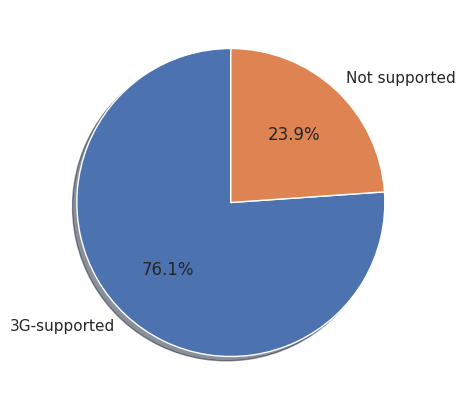

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

Percentage of phones that support 4G

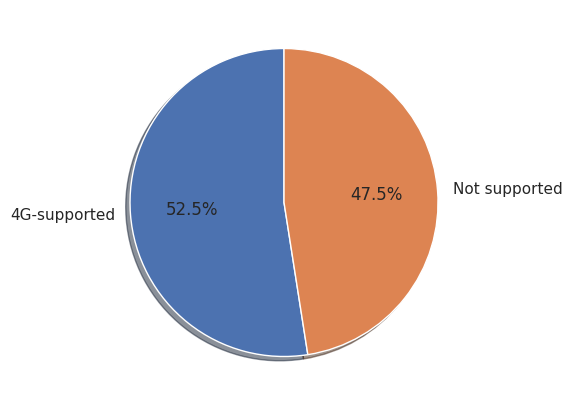

In [ ]:
labels4g = ["4G-supported",'Not supported']
values4g = train_data_f['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

number of elements in each class of mobile phones

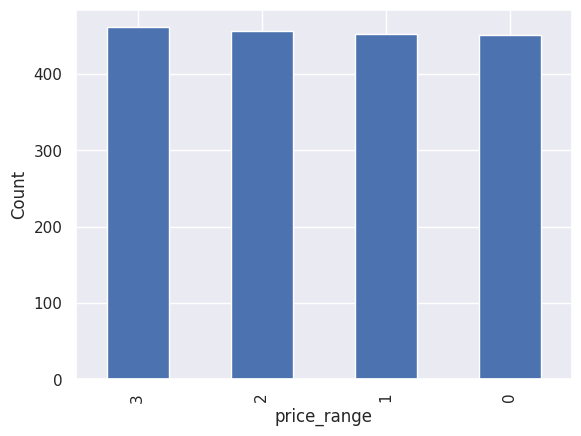

In [ ]:
sns.set()
price_plot=train_data_f['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

Battery power vs Price range

<Axes: xlabel='price_range', ylabel='battery_power'>

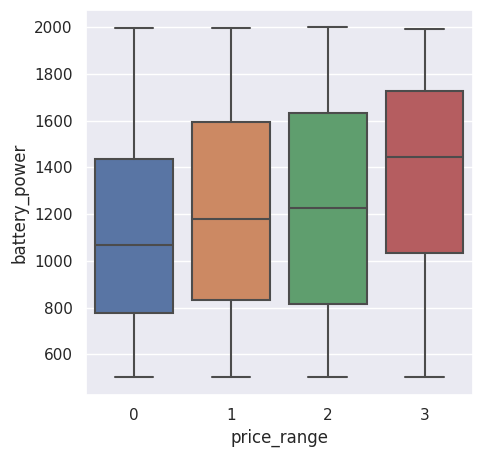

In [ ]:
sns.boxplot(x="price_range", y="battery_power", data=train_data_f)

how the battery mAh is spread

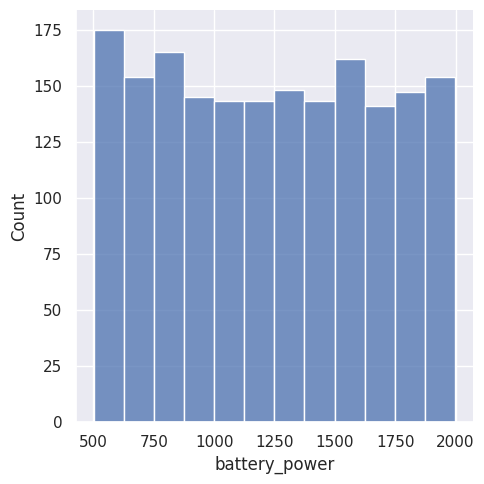

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["battery_power"])
plt.show()

count of devices having bluetooth and not having

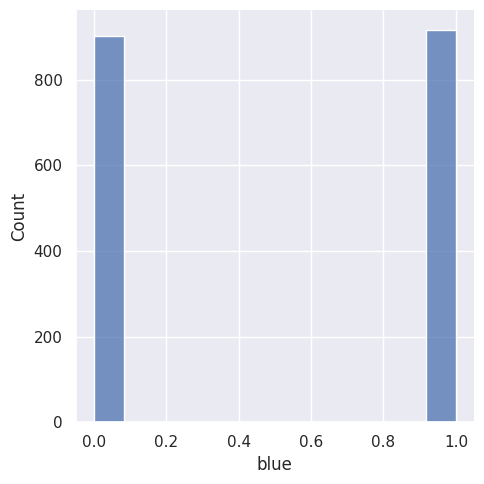

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["blue"])
plt.show()

mobile depth

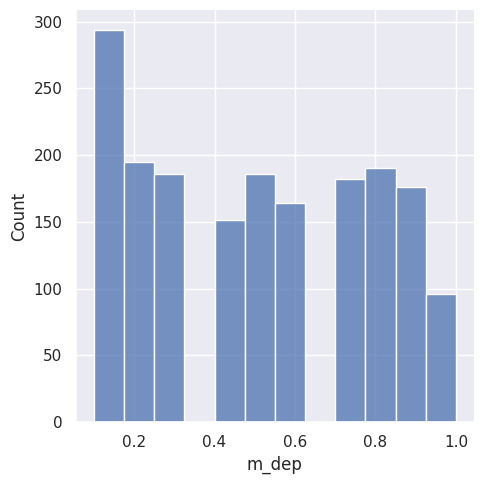

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["m_dep"])
plt.show()

In [ ]:
X=train_data_f.drop(['price_range'], axis=1)
y=train_data_f['price_range']
#missing values
X.isna().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
dtype: bool

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid= train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 7,
                           max_features= 15,
                           min_samples_leaf= 3,
                           min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)

In [ ]:
rfc.fit(X_train, y_train)
y_pred_rfc=rfc.predict(X_valid)

In [ ]:
y_pred_rfc

array([0, 2, 2, 3, 2, 3, 1, 1, 0, 0, 1, 2, 2, 0, 2, 1, 2, 3, 2, 2, 3, 2,
       0, 0, 1, 1, 1, 3, 3, 0, 0, 0, 3, 3, 1, 3, 3, 3, 2, 3, 2, 1, 1, 1,
       2, 1, 2, 2, 1, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 0, 1, 0, 3, 0, 2, 2,
       0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0, 2, 3, 2, 2, 1, 3, 1, 2, 3, 2,
       1, 3, 3, 1, 2, 1, 1, 0, 0, 2, 0, 1, 0, 2, 1, 3, 1, 0, 0, 0, 0, 1,
       1, 2, 2, 0, 2, 3, 0, 3, 0, 1, 3, 0, 3, 0, 3, 3, 1, 3, 3, 1, 3, 2,
       3, 1, 0, 2, 1, 0, 2, 2, 1, 3, 1, 0, 2, 2, 2, 0, 0, 2, 3, 0, 0, 3,
       0, 0, 0, 2, 1, 3, 3, 2, 3, 0, 2, 3, 1, 2, 0, 1, 3, 0, 3, 1, 3, 0,
       1, 2, 0, 0, 2, 3, 0, 3, 3, 0, 1, 1, 2, 1, 1, 0, 0, 1, 2, 2, 3, 3,
       3, 2, 3, 3, 1, 0, 1, 0, 2, 3, 1, 0, 3, 3, 2, 1, 0, 3, 3, 0, 1, 1,
       0, 2, 3, 1, 2, 3, 0, 0, 0, 0, 2, 0, 1, 3, 3, 0, 1, 3, 0, 3, 1, 1,
       3, 1, 3, 0, 0, 0, 1, 2, 1, 3, 1, 3, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1,
       3, 1, 1, 1, 0, 0, 2, 2, 0, 0, 3, 3, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0,
       0, 0, 3, 3, 1, 1, 2, 2, 0, 2, 2, 2, 3, 1, 3,

Random Forest Classifier Accuracy Score:  0.9093406593406593
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        95
           1       0.90      0.92      0.91        92
           2       0.82      0.86      0.84        86
           3       0.93      0.88      0.90        91

    accuracy                           0.91       364
   macro avg       0.91      0.91      0.91       364
weighted avg       0.91      0.91      0.91       364



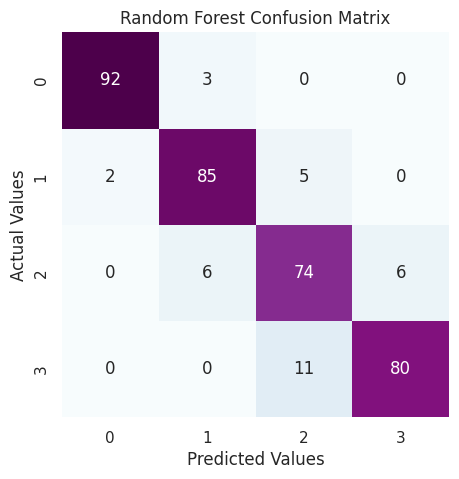

In [ ]:
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_rfc))
cm_rfc=my_confusion_matrix(y_valid, y_pred_rfc, 'Random Forest Confusion Matrix')

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=25)

In [ ]:
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_valid)

In [ ]:
y_pred_knn

array([0, 2, 2, 3, 2, 3, 1, 2, 0, 0, 1, 2, 2, 0, 2, 1, 2, 3, 2, 3, 3, 2,
       0, 0, 1, 1, 1, 3, 3, 0, 0, 0, 3, 3, 1, 3, 3, 3, 2, 3, 2, 1, 1, 1,
       2, 1, 2, 2, 1, 3, 1, 2, 2, 2, 1, 3, 2, 2, 3, 0, 1, 0, 3, 0, 3, 2,
       0, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 3, 2,
       1, 3, 3, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 3, 1, 3, 0, 0, 0, 0, 0, 1,
       1, 2, 2, 0, 1, 3, 0, 3, 0, 1, 3, 0, 3, 0, 3, 3, 1, 3, 3, 1, 3, 2,
       3, 1, 0, 2, 1, 1, 2, 2, 1, 3, 1, 0, 2, 2, 3, 0, 0, 2, 3, 0, 0, 3,
       0, 0, 0, 2, 1, 3, 3, 2, 3, 0, 2, 3, 1, 2, 0, 2, 3, 0, 3, 1, 3, 0,
       1, 2, 0, 0, 2, 3, 0, 3, 3, 0, 1, 1, 2, 1, 1, 0, 0, 1, 2, 2, 3, 3,
       3, 2, 3, 3, 1, 0, 1, 0, 2, 3, 1, 0, 2, 2, 2, 1, 0, 3, 3, 0, 1, 1,
       0, 2, 3, 1, 2, 3, 0, 0, 0, 0, 2, 0, 1, 3, 3, 0, 0, 3, 0, 2, 1, 1,
       3, 1, 3, 0, 0, 0, 1, 2, 1, 3, 1, 3, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1,
       3, 1, 1, 1, 0, 0, 2, 2, 0, 0, 3, 3, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0,
       0, 0, 3, 3, 1, 1, 1, 2, 0, 2, 2, 2, 3, 1, 3,

KNN Classifier Accuracy Score:  0.9340659340659341
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        95
           1       0.93      0.97      0.95        92
           2       0.87      0.88      0.88        86
           3       0.94      0.90      0.92        91

    accuracy                           0.93       364
   macro avg       0.93      0.93      0.93       364
weighted avg       0.93      0.93      0.93       364



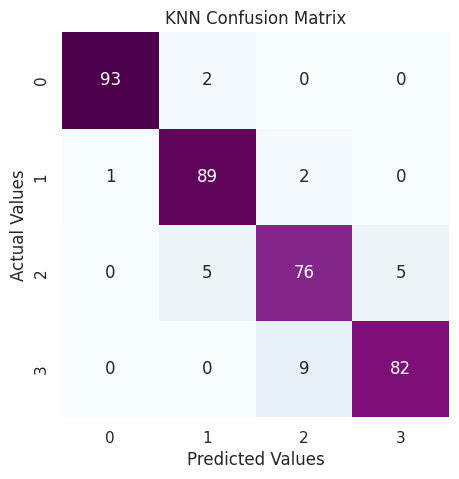

In [ ]:
print('KNN Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_knn))
cm_rfc=my_confusion_matrix(y_valid, y_pred_knn, 'KNN Confusion Matrix')

SVM

In [ ]:
from sklearn import svm
svm_clf = svm.SVC(decision_function_shape='ovo')
svm_clf.fit(X_train, y_train)
y_pred_svm=svm_clf.predict(X_valid)

In [ ]:
y_pred_svm

array([0, 2, 2, 3, 2, 3, 1, 2, 0, 0, 1, 2, 2, 0, 2, 1, 2, 3, 2, 2, 3, 2,
       0, 0, 1, 1, 1, 3, 3, 0, 0, 0, 3, 3, 1, 3, 3, 3, 2, 3, 2, 1, 1, 1,
       2, 1, 2, 2, 1, 3, 1, 2, 2, 2, 2, 3, 2, 2, 3, 0, 1, 0, 3, 0, 2, 2,
       0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 2, 3, 2, 2, 1, 2, 1, 2, 3, 2,
       1, 3, 3, 1, 2, 1, 1, 0, 0, 2, 0, 1, 0, 3, 1, 3, 1, 0, 0, 0, 0, 1,
       1, 2, 2, 0, 1, 3, 0, 3, 0, 1, 3, 0, 3, 0, 3, 3, 1, 3, 3, 1, 3, 2,
       3, 1, 0, 2, 1, 1, 2, 2, 0, 3, 1, 0, 2, 2, 2, 0, 0, 2, 3, 0, 0, 3,
       0, 0, 0, 2, 1, 3, 3, 2, 3, 0, 2, 3, 1, 2, 0, 1, 3, 0, 3, 1, 3, 0,
       1, 2, 0, 0, 2, 3, 0, 3, 3, 0, 1, 1, 2, 1, 1, 0, 0, 1, 2, 2, 3, 3,
       3, 2, 2, 3, 1, 0, 1, 0, 2, 3, 1, 0, 2, 2, 2, 1, 0, 3, 3, 0, 1, 1,
       0, 3, 3, 1, 2, 3, 0, 0, 0, 0, 2, 0, 1, 3, 3, 0, 0, 3, 0, 2, 1, 1,
       2, 1, 3, 0, 0, 0, 1, 2, 1, 3, 1, 3, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1,
       3, 1, 1, 1, 0, 0, 3, 2, 0, 0, 3, 3, 1, 1, 1, 1, 2, 0, 2, 2, 2, 0,
       0, 0, 3, 3, 1, 1, 1, 2, 0, 3, 2, 3, 3, 1, 3,

SVM Classifier Accuracy Score:  0.9587912087912088
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.93      0.97      0.95        92
           2       0.94      0.93      0.94        86
           3       0.99      0.96      0.97        91

    accuracy                           0.96       364
   macro avg       0.96      0.96      0.96       364
weighted avg       0.96      0.96      0.96       364



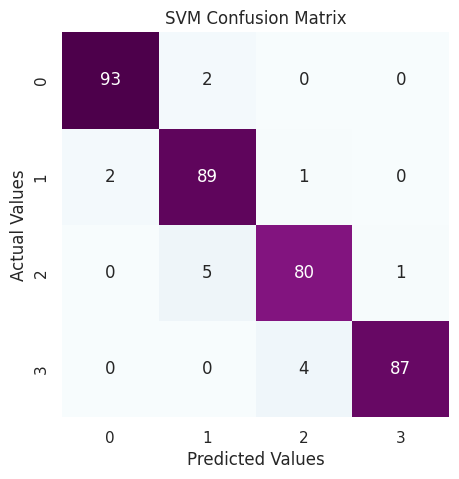

In [ ]:
print('SVM Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_svm))
cm_rfc=my_confusion_matrix(y_valid, y_pred_svm, 'SVM Confusion Matrix')

In [ ]:
compare_models=pd.DataFrame({"Algorithms":['Random Forest','SVM','KNN'],"Accuracies(%)":[90.93,95.87,93.40]})

In [ ]:
compare_models.sort_values(by="Accuracies(%)",ascending=False)

,Algorithms,Accuracies(%)
1,SVM,95.87
2,KNN,93.40
0,Random Forest,90.93


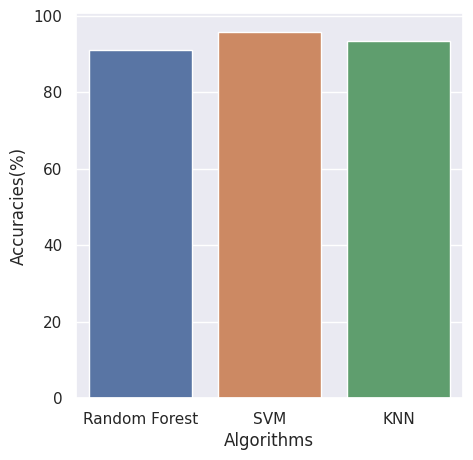

In [ ]:
sns.barplot(x="Algorithms",y="Accuracies(%)",data=compare_models)
plt.show()

Predictions on Test.csv

In [ ]:
data_test=pd.read_csv('test.csv')

In [ ]:
data_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
data_test=data_test.drop('id',axis=1)

In [ ]:
data_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [ ]:
predicted_price=knn.predict(data_test)

In [ ]:
predicted_price

array([3, 3, 3, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 2, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 2, 2, 3, 2, 3, 0, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 0, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 1, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 2, 2, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 2, 0, 2, 2, 1, 2, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 2, 1, 3, 2, 0, 3, 0, 0, 3, 0, 0, 3, 3, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [ ]:
data_test['price_range']=predicted_price

In [ ]:
data_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,3
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2
